In [83]:
import pandas as pd
import json
import matplotlib.pyplot as plt

folder_prefix = 'data'
df = pd.read_csv(folder_prefix + '/ข้อมูลพื้นฐานครัวเรือนยากจน_30_2566.csv', header=0, converters={'ละติจูด': str, 'ลองจิจูด': str})

In [70]:
df['ตำบล.1'].unique()

array(['โนนสูง', 'คูขาด', 'โคกกระชาย', 'ลำเพียก', 'จระเข้หิน', 'เมืองคง',
       'หนองมะนาว', 'โนนเต็ง', 'หนองบัว', 'ช่อระกา', 'โคกกระเบื้อง',
       'วังโพธิ์', 'บ้านเหลื่อม', 'ศรีละกอ', 'สีสุก', 'ท่าช้าง', 'หินโคน',
       'หนองพลวง', 'จักราช', 'คลองเมือง', 'โนนไทย', 'หนองหอย', 'มะค่า',
       'ถนนโพธิ์', 'พังเทียม', 'มาบกราด', 'ทัพรั้ง', 'สระพระ', 'กำปัง',
       'ห้วยแถลง', 'พลสงคราม', 'โตนด', 'หลุมข้าว', 'ธารปราสาท',
       'เมืองเกษตร', 'ชีวึก', 'ขามสะแกแสง', 'พะงาด', 'หนองหัวฟาน',
       'โนนทองหลาง', 'บึงสำโรง', 'ด่านช้าง', 'หนองตาดใหญ่',
       'หนองแจ้งใหญ่', 'สามเมือง', 'สีดา', 'เมืองพะไล', 'โพนทอง',
       'บัวลาย', 'ห้วยยาง', 'โนนประดู่', 'หนองหว้า', 'บัวใหญ่', 'บึงพะไล',
       'โนนสำราญ', 'แก้งสนามนาง', 'โนนจาน', 'กุดจอก', 'ดอนตะหนิน',
       'เสมาใหญ่', 'ขุนทอง', 'หนองบัวสะอาด', 'ทุ่งสว่าง', 'วังไม้แดง',
       'โคกกลาง', 'ดอนมัน', 'หันห้วยทราย', 'วังหิน', 'หนองค่าย',
       'ตลาดไทร', 'นางรำ', 'โนนแดง', 'สำพะเนียง', 'ประทาย', 'เมืองโดน',
       'วังหมี', 'ในเมือง', 'นิ

In [71]:
df['อำเภอ.1']

0        โนนสูง
1            คง
2        ครบุรี
3        ครบุรี
4        ครบุรี
         ...   
7499    ปากช่อง
7500    ปากช่อง
7501    ปากช่อง
7502    ปากช่อง
7503    ปากช่อง
Name: อำเภอ.1, Length: 7504, dtype: object

In [54]:
grouped_df = df.groupby(['อำเภอ.1', 'ตำบล.1']).size().reset_index(name='counts')

# Rename columns to English
grouped_df.rename(columns={'อำเภอ.1': 'districts', 'ตำบล.1': 'subdistricts'}, inplace=True)

# Convert to JSON
json_result = grouped_df.to_json(orient='records', force_ascii=False)

In [42]:
grouped_df['districts'].unique()

array(['ครบุรี', 'จักราช', 'ด่านขุนทด', 'ปักธงชัย', 'เฉลิมพระเกียรติ',
       'เมืองนครราชสีมา', 'โนนสูง'], dtype=object)

In [43]:
with open('pppconnext64.json', 'w', encoding='utf-8') as file:
    file.write(json_result)

In [11]:
with open("districts.geojson", "r") as read_file:
    data = json.load(read_file)

In [30]:

# Read the Excel file
file_path = 'data/เป้าหมาย TPMAP2566.xlsx'
df = pd.read_excel(file_path, sheet_name=0)

# Group by district and subdistrict and count occurrences
grouped_df = df.groupby(['อำเภอ', 'ตำบล']).size().reset_index(name='counts')

# Rename columns to English
grouped_df.rename(columns={'อำเภอ': 'districts', 'ตำบล': 'subdistricts'}, inplace=True)

# Convert to JSON
json_result = grouped_df.to_json(orient='records', force_ascii=False)

# Save to file
output_file_path = 'tpmap66.json'
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(json_result)



In [29]:
grouped_df['districts'].unique()

array(['ขามทะเลสอ', 'ขามสะแกแสง', 'ครบุรี', 'จักราช', 'ชุมพวง',
       'ด่านขุนทด', 'บัวลาย', 'บัวใหญ่', 'บ้านเหลื่อม', 'ประทาย',
       'ปักธงชัย', 'ปากช่อง', 'พระทองคำ', 'พิมาย', 'ลำทะเมนชัย',
       'วังน้ำเขียว', 'สีคิ้ว', 'สีดา', 'สูงเนิน', 'หนองบุญมาก',
       'ห้วยแถลง', 'เฉลิมพระเกียรติ', 'เทพารักษ์', 'เมืองนครราชสีมา',
       'เมืองยาง', 'เสิงสาง', 'แก้งสนามนาง', 'โชคชัย', 'โนนสูง', 'โนนแดง',
       'โนนไทย'], dtype=object)

In [13]:
data.keys()

dict_keys(['type', 'name', 'crs', 'features'])

In [17]:
data['features'][0]

{'type': 'Feature',
 'properties': {'amp_code': '9015',
  'amp_th': 'สิงหนคร',
  'amp_en': 'Singhanakhon',
  'pro_code': '90',
  'pro_th': 'สงขลา',
  'pro_en': 'Songkhla',
  'reg_nesdb': 'South',
  'reg_royin': 'South',
  'perimeter': 72.90849992408,
  'area_sqkm': 242.31695289685},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[100.55979799608701, 7.252124592641775],
     [100.57920607285662, 7.236317247223368],
     [100.57533302542383, 7.225623070420481],
     [100.58549717228297, 7.197638373598489],
     [100.58095344971012, 7.182707219653707],
     [100.57268744283282, 7.170123959483009],
     [100.57264209496647, 7.170100942188101],
     [100.55487635707799, 7.181514522902227],
     [100.540001929351, 7.189217696298802],
     [100.46056009034483, 7.186133426865882],
     [100.43828900422102, 7.251005504726477],
     [100.40899726959847, 7.267226470945768],
     [100.41115034731133, 7.273363542027965],
     [100.42525922137007, 7.281055858184111],
     [100.42617896921

(array([100.,  22.,   4.,   4.,   2.,   1.,   0.,   0.,   0.,   2.]),
 array([  1. ,  62.9, 124.8, 186.7, 248.6, 310.5, 372.4, 434.3, 496.2,
        558.1, 620. ]),
 <BarContainer object of 10 artists>)

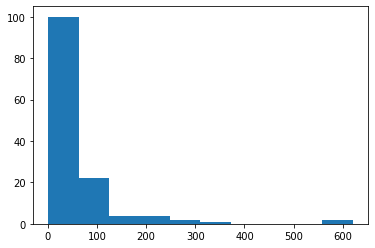

In [58]:
plt.hist(grouped_df['counts'], bins=10)

In [44]:
filtered_features = [feature for feature in data['features'] if feature['properties']['pro_code'] == '30']

In [49]:
filtered_features

[{'type': 'Feature',
  'properties': {'amp_code': '3022',
   'amp_th': 'หนองบุญมาก',
   'amp_en': 'Nong Bun Mak',
   'pro_code': '30',
   'pro_th': 'นครราชสีมา',
   'pro_en': 'Nakhon Ratchasima',
   'reg_nesdb': 'Northeast',
   'reg_royin': 'Northeast',
   'perimeter': 104.32669238224,
   'area_sqkm': 549.17880311995},
  'geometry': {'type': 'MultiPolygon',
   'coordinates': [[[[102.36582121269355, 14.619539466341909],
      [102.35198055008438, 14.607200362203441],
      [102.3337297708559, 14.599936062335644],
      [102.28063472932065, 14.61218926100647],
      [102.27721024141563, 14.636371952548574],
      [102.2652978695874, 14.648649134336356],
      [102.26331691585065, 14.654760014262836],
      [102.26600636451398, 14.67285173909513],
      [102.2615145213902, 14.702686908320187],
      [102.2647628297644, 14.712665192175619],
      [102.27088821380961, 14.722590305664339],
      [102.28606975527754, 14.725641265699194],
      [102.28945525588061, 14.729936955346608],
      [

In [50]:
# Create a new GeoJSON structure with the filtered features
filtered_geojson = {
    'type': 'FeatureCollection',
    'features': filtered_features
}

# Save the filtered GeoJSON to a new file
with open('nakhon_ratchasima_districts.geojson', 'w', encoding='utf-8') as file:
    json.dump(filtered_geojson, file, ensure_ascii=False, indent=2)

In [60]:
# Load the JSON file with counts
with open('data/pppconnext66.json', 'r', encoding='utf-8') as file:
    count_data = json.load(file)

# Extract counts for each district
district_counts = {}
for item in count_data:
    district = item['districts']
    count = item['counts']
    if district in district_counts:
        district_counts[district] += count
    else:
        district_counts[district] = count

# Save the district counts to a JSON file
with open('pppconnext65_district_counts.json', 'w', encoding='utf-8') as file:
    json.dump(district_counts, file, ensure_ascii=False, indent=2)

print("District counts saved to district_counts.json")


District counts saved to district_counts.json


In [80]:
# Load the JSON file with counts
with open('data/pppconnext66.json', 'r', encoding='utf-8') as file:
    count_data = json.load(file)

# Extract counts for each district
subdistrict_counts = {}
for item in count_data:
    subdistrict = item['subdistricts']
    count = item['counts']
    if subdistrict in subdistrict_counts:
        subdistrict_counts[subdistrict] += count
    else:
        subdistrict_counts[subdistrict] = count

# Save the district counts to a JSON file
with open('data/pppconnext66_subdistrict_counts.json', 'w', encoding='utf-8') as file:
    json.dump(subdistrict_counts, file, ensure_ascii=False, indent=2)

print("Subdistrict counts saved to subdistrict_counts.json")


Subdistrict counts saved to subdistrict_counts.json


In [65]:
count_data

[{'districts': 'ขามสะแกแสง', 'subdistricts': 'ขามสะแกแสง', 'counts': 91},
 {'districts': 'ขามสะแกแสง', 'subdistricts': 'ชีวึก', 'counts': 5},
 {'districts': 'ขามสะแกแสง', 'subdistricts': 'พะงาด', 'counts': 69},
 {'districts': 'ขามสะแกแสง', 'subdistricts': 'หนองหัวฟาน', 'counts': 3},
 {'districts': 'ขามสะแกแสง', 'subdistricts': 'เมืองเกษตร', 'counts': 13},
 {'districts': 'คง', 'subdistricts': 'คูขาด', 'counts': 67},
 {'districts': 'คง', 'subdistricts': 'หนองบัว', 'counts': 1},
 {'districts': 'คง', 'subdistricts': 'หนองมะนาว', 'counts': 31},
 {'districts': 'คง', 'subdistricts': 'เมืองคง', 'counts': 19},
 {'districts': 'คง', 'subdistricts': 'โนนเต็ง', 'counts': 14},
 {'districts': 'ครบุรี', 'subdistricts': 'จระเข้หิน', 'counts': 22},
 {'districts': 'ครบุรี', 'subdistricts': 'ลำเพียก', 'counts': 1},
 {'districts': 'ครบุรี', 'subdistricts': 'โคกกระชาย', 'counts': 4},
 {'districts': 'จักราช', 'subdistricts': 'คลองเมือง', 'counts': 4},
 {'districts': 'จักราช', 'subdistricts': 'จักราช', 'count

In [68]:
total_sub = 0
for i in count_data: 
    total_sub += i['counts']
    print(total_sub)

91
96
165
168
181
248
249
280
299
313
335
336
340
344
373
403
434
465
481
534
692
720
769
788
792
900
923
1038
1089
1181
1193
1231
1259
1279
1288
1342
1601
1646
1675
1787
1816
1886
1898
1901
1912
1977
1980
1983
1985
1987
1996
1997
2013
2015
2033
2037
2041
2062
2153
2316
2627
3247
3267
3484
3671
3780
3840
4418
4519
4775
4827
4841
4853
4919
4983
5032
5139
5149
5239
5252
5458
5644
5662
5674
5731
5898
5906
5941
6004
6108
6299
6377
6382
6410
6446
6459
6511
6521
6542
6558
6641
6653
6685
6741
6758
6768
6867
6915
7024
7045
7089
7135
7140
7143
7145
7146
7148
7154
7164
7180
7198
7208
7247
7300
7309
7322
7354
7392
7416
7434
7442
7452
7475
7484
7504


In [81]:
with open("subdistricts.geojson", "r") as read_file:
    data = json.load(read_file)
    
filtered_features = [feature for feature in data['features'] if feature['properties']['pro_code'] == '30']

In [82]:
# Create a new GeoJSON structure with the filtered features
filtered_geojson = {
    'type': 'FeatureCollection',
    'features': filtered_features
}

# Save the filtered GeoJSON to a new file
with open('nakhon_ratchasima_subdistricts.geojson', 'w', encoding='utf-8') as file:
    json.dump(filtered_geojson, file, ensure_ascii=False, indent=2)

In [91]:
# Filter out the specific columns
filtered_df = df[['อำเภอ.1', 'ละติจูด', 'ลองจิจูด']]
filtered_df.rename(columns={'อำเภอ.1': 'districts', 'ละติจูด': 'lat', 'ลองจิจูด': 'lon'}, inplace=True)

# Convert the filtered DataFrame to JSON
filtered_json = filtered_df.to_json(orient='records', force_ascii=False)

# Save the JSON to a file
with open('pppconnext66_latlon.json', 'w', encoding='utf-8') as f:
    f.write(filtered_json)

/var/folders/j7/8kr9rjgj05q6_s68xl5936_w0000gn/T/ipykernel_5794/3104192043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={'อำเภอ.1': 'districts', 'ละติจูด': 'lat', 'ลองจิจูด': 'lon'}, inplace=True)


In [92]:
filtered_df

,districts,lat,lon
0,โนนสูง,15.210614,102.253239
1,คง,15.439507,102.384924
2,ครบุรี,14.412120,102.220664
3,ครบุรี,14.412129,102.220937
4,ครบุรี,14.386943,102.272834
...,...,...,...
7499,ปากช่อง,14.7232443,101.3331337
7500,ปากช่อง,14.548305,101.426582
7501,ปากช่อง,14.7010382,101.4175171
7502,ปากช่อง,14.5662453,101.5701888


In [94]:
filtered_features = [feature for feature in data['features'] if feature['properties']['amp_code'] == '3006']

In [95]:
filtered_features

[{'type': 'Feature',
  'properties': {'tam_code': '300601',
   'tam_th': 'จักราช',
   'tam_en': 'Chakkarat',
   'amp_code': '3006',
   'amp_th': 'จักราช',
   'amp_en': 'Chakkarat',
   'pro_code': '30',
   'pro_th': 'นครราชสีมา',
   'pro_en': 'Nakhon Ratchasima',
   'reg_nesdb': 'Northeast',
   'reg_royin': 'Northeast',
   'perimeter': 44.57025177309,
   'area_sqkm': 75.79987008916},
  'geometry': {'type': 'MultiPolygon',
   'coordinates': [[[[102.49106239874914, 15.061440002924305],
      [102.4777124510305, 15.062874003402454],
      [102.47894993745173, 15.03761970899562],
      [102.46121605396209, 15.037125807369222],
      [102.45926410654377, 15.019511386070848],
      [102.47062076959355, 15.020844554911182],
      [102.4688764660896, 15.013447768535364],
      [102.48176420772114, 14.997745093996095],
      [102.47895420097197, 14.992674430518397],
      [102.46269198655928, 14.989660347849592],
      [102.45140235680424, 14.99598029687882],
      [102.44316072093771, 14.992565

In [101]:
from shapely.geometry import shape

def get_feature_center(feature):
    geometry = shape(feature['geometry'])
    centroid = geometry.centroid
    return centroid.x, centroid.y

def process_features(features):
    result = []
    for feature in features:
        tam_th = feature['properties']['tam_th']
        tam_code = feature['properties']['tam_code']
        center_x, center_y = get_feature_center(feature)
        result.append({
            'tam_th': tam_th,
            'tam_code': tam_code,
            'center_x': center_x,
            'center_y': center_y
        })
    return result

In [102]:
processed_data = process_features(filtered_features)

In [103]:
processed_data

[{'tam_th': 'จักราช',
  'tam_code': '300601',
  'center_x': 102.43326530948131,
  'center_y': 15.032673519526208},
 {'tam_th': 'ทองหลาง',
  'tam_code': '300603',
  'center_x': 102.35430155984825,
  'center_y': 15.051137037645898},
 {'tam_th': 'สีสุก',
  'tam_code': '300604',
  'center_x': 102.38561144396425,
  'center_y': 14.873909892021329},
 {'tam_th': 'หนองขาม',
  'tam_code': '300605',
  'center_x': 102.50848263851486,
  'center_y': 14.929848093157277},
 {'tam_th': 'หนองพลวง',
  'tam_code': '300607',
  'center_x': 102.39206694317413,
  'center_y': 15.088246517565581},
 {'tam_th': 'ศรีละกอ',
  'tam_code': '300610',
  'center_x': 102.42644691838477,
  'center_y': 14.938734239345147},
 {'tam_th': 'คลองเมือง',
  'tam_code': '300611',
  'center_x': 102.50296283983009,
  'center_y': 14.847312048506595},
 {'tam_th': 'หินโคน',
  'tam_code': '300613',
  'center_x': 102.49403198755397,
  'center_y': 15.00614157109956}]

In [104]:
with open('3006_centers.json', 'w', encoding='utf-8') as f:
    json.dump(processed_data, f, ensure_ascii=False, indent=2)

In [124]:
# Load the JSON file with counts
with open('data/cddhome66.json', 'r', encoding='utf-8') as file:
    count_data = json.load(file)

# Extract counts for each district
district_counts = {}
for item in count_data:
    district = item['districts']
    count = item['counts']
    if district in district_counts:
        district_counts[district] += count
    else:
        district_counts[district] = count

# Save the district counts to a JSON file
with open('data/cddhome66_district_counts.json', 'w', encoding='utf-8') as file:
    json.dump(district_counts, file, ensure_ascii=False, indent=2)

print("District counts saved to district_counts.json")


District counts saved to district_counts.json


In [107]:
# Read the Excel file
file_path = 'MSO.xlsx'
df = pd.read_excel(file_path, sheet_name=0)

df['อำเภอ'] = df['อำเภอ'].str.replace('อำเภอ', '').str.strip()

# Group by district and subdistrict and count occurrences
grouped_df = df.groupby(['อำเภอ', 'ตำบล.1']).size().reset_index(name='counts')

# Rename columns to English
grouped_df.rename(columns={'อำเภอ': 'districts', 'ตำบล.1': 'subdistricts'}, inplace=True)

# Convert to JSON
json_result = grouped_df.to_json(orient='records', force_ascii=False)

# Save to file
output_file_path = 'mso66.json'
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(json_result)



In [122]:

# Read the Excel file
file_path = 'cdd66_home.xlsx'
df = pd.read_excel(file_path, sheet_name=0)

# Group by district and subdistrict and count occurrences
grouped_df = df.groupby(['districtname', 'subdistrictname']).size().reset_index(name='counts')

# Rename columns to English
grouped_df.rename(columns={'districtname': 'districts', 'subdistrictname': 'subdistricts'}, inplace=True)

# Convert to JSON
json_result = grouped_df.to_json(orient='records', force_ascii=False)

# Save to file
output_file_path = 'cddhome66.json'
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(json_result)



In [121]:
# Function to combine district counts from two JSON files
def combine_district_counts(file1_path, file2_path, output_path):
    # Load the two JSON files
    with open(file1_path, encoding='utf-8') as file1, open(file2_path, encoding='utf-8') as file2:
        data1 = json.load(file1)
        data2 = json.load(file2)

    # Combine the counts from both files
    combined_counts = data1.copy()

    for district, count in data2.items():
        if district in combined_counts:
            combined_counts[district] += count
        else:
            combined_counts[district] = count

    # Save the combined counts to a new JSON file
    with open(output_path, 'w', encoding='utf-8') as output_file:
        json.dump(combined_counts, output_file, ensure_ascii=False, indent=4)

# Example usage
file1_path = 'data/pppconnext65_district_counts.json'
file2_path = 'data/pppconnext66_district_counts.json'
output_path = 'data/combined_district_counts_66.json'

combine_district_counts(file1_path, file2_path, output_path)


In [126]:
def excel_to_json(excel_file, json_file):
    # Read the Excel file
    df = pd.read_excel(excel_file)

    # Convert DataFrame to a dictionary
    data = df.to_dict(orient='records')

    # Write the dictionary to a JSON file
    with open(json_file, 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

# Example usage
excel_file = 'cddincome.xlsx'  # Replace with your Excel file path
json_file = 'data/cddincome66_district_counts.json'  # Replace with your desired JSON file path

excel_to_json(excel_file, json_file)

In [130]:
df = pd.read_excel(excel_file, header=None, names=['district', 'count'])

# Convert DataFrame to a dictionary
# data = df.to_dict(orient='records')
data = df.set_index('district')['count'].to_dict()

# Write the dictionary to a JSON file
json_file = 'district_data.json'
with open(json_file, 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)

In [129]:
df

,district,count
0,แก้งสนามนาง,10
1,ขามทะเลสอ,30
2,ครบุรี,6
3,จักราช,3
4,เฉลิมพระเกียรติ,15
5,ชุมพวง,65
6,โชคชัย,11
7,ด่านขุนทด,30
8,เทพารักษ์,4
9,โนนไทย,23
